in progress...

# Mount File System Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from pathlib import Path
from tqdm import tqdm
import os
%matplotlib inline


## Change working directory 

In [ ]:
!ls  

In [ ]:
!ls 'drive/My Drive/pytorch-EverybodyDanceNow/notebook'

In [ ]:

os.chdir('drive/My Drive/pytorch-EverybodyDanceNow/notebook')

### Normalize 

In [23]:
target_img = cv2.imread('../data/target/images/img_00000.png')[:,:,0]
target_img_rgb = cv2.imread('../data/target/images/img_00000.png')

source_img = cv2.imread('../data/source/images/img_00000.png')[:,:,0]

source_img_rgb = cv2.imread('../data/source/images/img_00000.png')

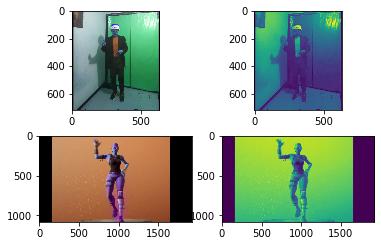

In [24]:
plt.subplot(222)
plt.imshow(target_img)
plt.subplot(221)
plt.imshow(target_img_rgb)
plt.subplot(224)
plt.imshow(source_img)
plt.subplot(223)
plt.imshow(source_img_rgb)
plt.savefig('norm.png')
plt.show()

In [25]:
def get_scale(label_img):
    """
    label_img: numpy array
        stick man pose representation
    
    return range of colors  and height
    
    
    """
   
    any1 = label_img.any(axis = 1) # Check if each row as entry > 0. Values  >0 indicates stick man.
    
    
    linspace1 = np.arange(len(any1))
    
    # Get most rigth   position and height of image
    head_x, height = linspace1[list(any1)][0],len( linspace1[list(any1)])
    
    any0 = label_img[head_x, : ] != 0 
    
    linspace2 = np.arange(len(any0))
    
    # mean y position.
    head_y = int(np.mean(linspace2[list(any0)])) 
    
    return (head_x,head_y),height

def process_img(img):    
    """
    img: numpy array
        image.
    return reshaped image
    """
    
    shape_dst = np.min(img.shape[:2])
    oh = (img.shape[0] - shape_dst) // 2
    ow = (img.shape[1] - shape_dst) // 2

    img = img[oh:oh+shape_dst, ow:ow+shape_dst]
    img = cv2.resize(img, (512, 512))
    
    return img

In [26]:
# Target does not need preprocess. 
target_head, target_height = get_scale(target_img)
target_head_x, target_head_y = target_head[0],target_head[1]


target_head, target_height

((0, 313), 715)

Save Dir  ..\data\source
Len 10
Source head (0, 255), and height 512


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Image path:  ..\data\source\test_label_ori\00000.png
Head (100, 100, 3)


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  6.51it/s]

Image path:  ..\data\source\test_label_ori\00001.png
Head (100, 100, 3)


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  6.69it/s]

Image path:  ..\data\source\test_label_ori\00002.png
Head (100, 100, 3)


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  6.84it/s]

Image path:  ..\data\source\test_label_ori\00003.png
Head (100, 100, 3)


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00,  6.85it/s]

Image path:  ..\data\source\test_label_ori\00004.png
Head (100, 100, 3)


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:00<00:00,  6.81it/s]

Image path:  ..\data\source\test_label_ori\00005.png
Head (100, 100, 3)


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:00<00:00,  6.76it/s]

Image path:  ..\data\source\test_label_ori\00006.png
Head (100, 100, 3)


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  6.63it/s]

Image path:  ..\data\source\test_label_ori\00007.png
Head (100, 100, 3)


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  6.52it/s]

Image path:  ..\data\source\test_label_ori\00008.png
Head (100, 100, 3)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  5.97it/s]

Image path:  ..\data\source\test_label_ori\00009.png
Head (100, 100, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.95it/s]


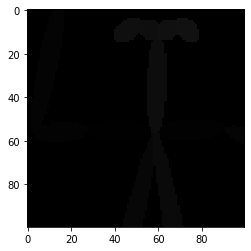

In [27]:
new_head_pose = []

save_dir = Path('../data/source/')
print("Save Dir ", save_dir )

# Labels dir
path = save_dir.joinpath('test_label_ori')


output = save_dir.joinpath('test_label')
output.mkdir(exist_ok=True)

head_dir = save_dir.joinpath('test_head')
head_dir.mkdir(exist_ok=True)

pose_dir = Path('../data/source/pose_source.npy')
pose_cord = np.load(str(pose_dir))



labels_imgs = os.listdir(path)
print("Len", len(labels_imgs))


#Preprocess source image to lead proportions with shape (512,512)
source_head, source_height = get_scale( process_img( source_img ) )
print("Source head {}, and height {}".format(source_head, source_height))

for img_idx in tqdm(range( len(labels_imgs))):
    image_path = os.path.join(   path, '{:05}.png'.format(img_idx))
    #print("Image path: ",image_path )
    
    
    
    img = cv2.imread( image_path)
    img = process_img(img)
    
    new_shape = ( int(img.shape[0] * target_height / source_height),
                  int(img.shape[1] * target_height / source_height)
                )
    
    
    source_rsize = cv2.resize( img,
                               new_shape 
                              )
    
    source_pad = np.pad(source_rsize,
                        ((1000, 1000), (1000, 1000),(0,0)), 
                        mode = 'edge')
    #print("Source pad shape", source_pad.shape)
    source_head_rs , source_height_rs = get_scale( source_pad[:,:,0])
    source_head_rs_x = source_head_rs[0]
    source_head_rs_y = source_head_rs[1]
    
    
    new_source = source_pad[
        (source_head_rs_x - target_head_x):(source_head_rs_x + (target_img.shape[0] - target_head_x)),
        int((source_pad.shape[1] - target_img.shape[1])/2):int(source_pad.shape[1]-(source_pad.shape[1] - target_img.shape[1])/2)
                           ]
    #print("New source shape", new_source.shape)
    
    new_source_head, _ = get_scale(new_source[:,:,0])
    
    source_head_x, source_head_y = source_head
    source_cord_y, source_cord_x = pose_cord[0]
    
    new_head_x =int(new_source_head[0] - (source_head_x -source_cord_x) * (target_height / source_height))
    new_head_y =int(new_source_head[1] - (source_head_y -source_cord_y))
    
    
    
    crop_size =50 #50 
    new_head_pose.extend([ [new_head_y, new_head_x] ])
    
    #print("Crops", new_head_x -crop_size,new_head_x +crop_size  )
    
    
    x_0, x_1 = new_head_x -crop_size, new_head_x + crop_size
    x_0 = x_0  if x_0 >=0 else 0
    
    y_0,y_1 = new_head_y -crop_size, new_head_y + crop_size
    
    head = img[ x_0  : x_1 ,
                y_0  : y_1  ,
                     :  
              ]
    
    #print("Head", head.shape)
    
    plt.imshow(head)
    
    plt.savefig( str( head_dir.joinpath('pose_{}.jpg'.format(img_idx) ) )  )
    
    cv2.imwrite(str( output.joinpath('{:05}.png'.format(img_idx))), new_source)
    
    
pose_cords_arr = np.array(new_head_pose, dtype = np.int)
np.save(  str( save_dir.joinpath('pose_source_norm.npy')  ) , pose_cords_arr )
    
    